<style>
ol li { margin-bottom: 12px }
ol li p { margin-bottom: 4px}
</style>

## Kolesarjenje po Manhattnu

Niso pa, o nikakor, vsa mesta tako srečna kot Ljubljana. Tule je primer iz New Yorka, konkretno, Manhattna. Kolesarske steze so kratke, predvsem pa pravokotne ena na drugo in zato neprijetna zaradi ostrih zavojev. (Disclaimer: avtor naloge je bil nazadnje v New Yorku pred dvajsetimi leti in, iskreno, nima pojma. Prav gotovo pa kolesarjem v New Yorku ni tako prijetno kot v Ljubljani. Gospa Angelca je ena sama.)

**Ta naloga se ocenjuje, zato vam ne sme manjkati.** Za nalogo za določeno oceno je potrebno pravilno rešiti tudi vse naloge za nižjo oceno.

V nalogi bomo delali s povezavami in mrežami.

- **Povezava** je podana s četverko `(x0, y0, x1, y1)`, kjer `(x0, y0)` predstavljata koordinato enega in `(x1, y1)` koordinato drugega krajišča. Vrstni red je poljuben in nepomemben: `(x0, y0, x1, y1)` in `(x1, y1, x0, y0)` sta ena in ista povezava. Koordinate x tečejo od leve proti desni, y tečejo od zgoraj navzdol. Vse koordinate so cela števila.
- **Mreža** pa bode slovar, katerega ključi so pari povezav (torej pari četvork, kot smo jih opisali zgoraj), ki se sekajo, pripadajoča vrednost pa je točka, v kateri se povezavi sekata. Eden od ključev je, recimo `((13, 15, 13, 16), (13, 16, 21, 16))`, pripadajoča vrednost pa je `(13, 16)`, saj se povezavi `(13, 15, 13, 16)` in `(13, 16, 21, 16)` sekata v točki `(13, 16)`. **Povezave v ključih so urejene:** v vsaki povezavi je prva točka, `x0, y0` levo oz. višje od druge, in prva povezava se začne levo od druge, če imata obe enako prvo koordinato, pa se prva povezava začne višje od druge.

Povezava so vedno zapisane tako, da se ne "nadaljujejo". V podatkih ne boste nikoli našli povezav `(10, 5, 16, 5)` in `(16, 5, 20 5)`, temveč bo to opisano kot ena sama povezava `(10, 5, 20, 5)`. Prav tako se povezave ne prekrivajo.

Zemljevid povezav v večini testnih primerov je takšen.

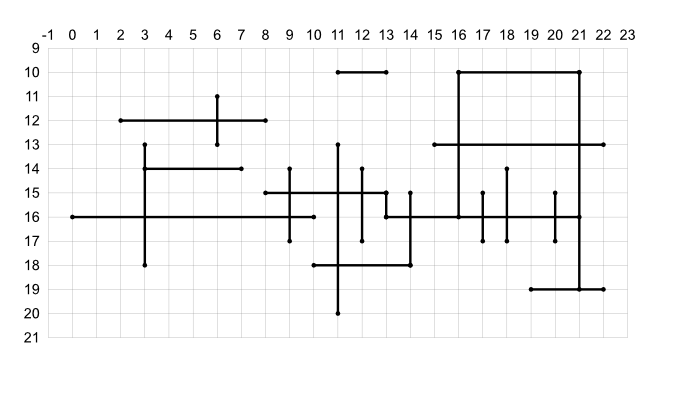

Predstavljen je s seznamom

```python
povezave = [
    (11, 10, 13, 10),

    (2, 12, 8, 12),
    (6, 11, 6, 13),

    (0, 16, 10, 16),
    (3, 18, 3, 13),
    (7, 14, 3, 14),
    (9, 17, 9, 14),

... in tako naprej
```


Z izjemo prvih dveh nalog, bodo povezave vedno pravilne, torej navpične ali vodoravne in dolge vsaj 1.

## Ocena 6

### `pravilna(povezava)`

- `pravilna(povezava)` dobi kot argument četverko `(x0, y0, x1, y1)` in mora vrniti `True`, če četverka predstavlja pravilno povezavo, in `False` če ne. Povezava je pravilna, če je vodoravna ali navpična in njena dolžina ni 0.

    - Klica `pravilna((18, 5, 13, 5))` in `pravilna((5, 18, 5, 13))` vrneta `True`, saj gre za vodoravno oz. navpično povezavo.
    - Klic `pravilna((10, 18, 12, 4))` vrne `False`, ker je povezave poševna.
    - Klic `pravilna((10, 18, 10, 18))` vrne `False`, ker je povezava dolga `0`.

#### Rešitev

Povezava je pravilna, če velja `x0 == x1` ali `y0 == y1`, ne pa oboje.

Začetnik napiše - in kdo bi mu lahko kaj očital - takole.

In [5]:
def pravilna(povezava):
    return povezava[0] == povezava[2] and povezava[1] != povezava[3] or povezave[0] != povezave[2] and povezava[1] == povezava[3]

Preudarnejši, previdnejši kajpa ve, da se človek v indeksih prerad izgubi, zato povezavo razpakira v lepo poimenovane spremenljivke.

In [4]:
def pravilna(povezava):
    x0, x1, y0, y1 = povezava
    return x0 == x1 and y0 != y1 or x0 != x1 and y0 == y1

In še nekaj doda. Čeprav je to čisto pravilno, združi dele izraza z oklepaji, da bo jasneje, kaj hoče povedati.

In [6]:
def pravilna(povezava):
    x0, x1, y0, y1 = povezava
    return (x0 == x1 and y0 != y1) or (x0 != x1 and y0 == y1)

Med študenti je zaznati, da funkcij ne jemljejo kot "podatek" (narekovaji so tu na mestu zato, ker bi bilo bolj prav reči "objekt", vendar naj tu pravilnost odstopi prostor jasnosti). Nenavadno jim je, da bi funkcijo lahko "shranili v spremenljivko", naredili seznam funkcij, podali funkcijo kot argument funkciji ali pa funkcijo vrnili kot rezultat funkcije. To je razumljivo: dojemati funkcijo kot podatek zahteva miselni preskok.

Bolj zanimivo je, da študenti tudi rezultata logičnega izraza, na primer `x0 == x1`, ne jemljejo kot "podatek". Čeprav je. Rezultat `x0 == x1` je bodisi `True` bodisi `False`, in to je vrednost, kot katerakoli druga. Z njo lahko počnemo enake reči kot s katerimikoli drugimi vrednostmi.

Razmislimo torej: `x0 == x1` je `True` ali `False`; eno ali drugo in nikoli nič tretjega. Enako velja za `y0 == y1`. Če nam je preveriti, da je eden od njiju `True` in drugi `False` in če vemo, da ne moreta biti nič tretjega, nas torej zanima, ali sta različna.

In [7]:
def pravilna(povezava):
    x0, x1, y0, y1 = povezava
    return (x0 == x1) != (y0 == x1)

Oklepaji so zdaj potrebni, da Python ve, kaj pravzaprav primerjamo s čim.

Zdaj, ko smo zmanjšali število primerjav, mogoče ni več tako hudo, če delamo kar z indeksi.

In [8]:
def pravilna(povezava):
    return (povezava[0] == povezava[2]) != (povezava[1] == povezava[3])

Ali pa tudi ne. Če ne bi šlo za domačo nalogo temveč za čisto zaresen program, bi najbrž naredil prvo, saj je pri tem manj možnosti, da se 
bom zmotil. Človek si ne sme preveč zaupati.

Tule je če ena, bolj čudna rešitev: hočemo razpakirati in hočemo v eni vrstici.

In [9]:
def pravilna(povezava):
    return (lambda x0, y0, x1, y1: (x0 == x1) != (y0 == y1))(*povezava)

Naj razume, kdor hoče. Tako se - v Pythonu! - ne programira. Objavljam bolj zato, ker tole zelo spominja na Lispov `let`, s katerim priredimo neki vrednosti ime, pod katerim je dostopno v funkciji, ki jo `let`-u podamo kot argument. V Pythonu je to videti bizarno, v Kotlinu, ki ima Lispovski `let` kar pod imenom `let`, pa elegantno.

Omenimo še često napako študentov:

In [13]:
def pravilna(povezava):
    return all((x0 == x1) != (y0 == y1) for x0, y0, x1, y1 in povezava)

To ne deluje. `for` tu pričakuje, da bo `povezava` *seznam* četvork, ne ena sama četvorka. `for`-a ne moremo uporabiti za razpakiranje ene same stvari.

Obstaja hecen obvoz.

In [14]:
def pravilne(povezava):
    return all((x0 == x1) != (y0 == y1) for x0, y0, x1, y1 in (povezava, ))

To je zanimiv trik, ki sem se ga spomnil ob odgovarjanju na sporočilo enega od študentov. Ne počnite tega. To je zabavno, vendar težko razumljivo. Nekdo, ki bo bral to kodo, bo moral pomisliti, da bo razumel, kaj se dogaja. Boljše je napisati v dveh vrsticah.

### `pravilne(povezave)`

- `pravilne(povezave)` dobi seznam takšnih povezav in vrne `True`, če so vse povezave v njem pravilne.

#### Rešitev

Zeh.

In [ ]:
def pravilne(povezave):
    for povezava in povezave:
        if not pravilna(povezava):
            return False
    return True

Lepša rešitev prepusti pogojni stavek `all`-u.

In [10]:
def pravilne(povezave):
    return all(pravilna(povezava) for povezava in povezave)

Še lepša rešitev se ne znebi le pogojev temveč tudi zanke - prepusti jo `map`-u.

In [11]:
def pravilne(povezave):
    return all(map(pravilna, povezave))

`map`, ki smo ga le sramežljivo omenili tu in tam, sprejme dva argumenta, funkcijo in generator. Za vsak element, ki ga zgenerira generator, pokliče funkcijo in vrača (točneje: generira) vrednosti. Tole je zvenelo zapleteno, povejmo raje s kodo: `map(f, g)` je ekvivalenten `(f(x) for x in g)`. In tako je `map(pravilna, povezave)` ekvivalenten `(pravilna(x) for x in povezave)`.

### `urejena(povezava)`

- `urejena(povezava)` prejme povezavo in vrne povezavo, v kateri so pari urejeni: prva točka je levo oz. višje od druge.

    Klic `urejena((13, 5, 18, 5))` vrne `(13, 5, 18, 5)`, klic `urejena((18, 5, 13, 5))` pa vrne `(13, 5, 18, 5)`.

#### Rešitev

Ta naloga je potrebna predvsem zato, da nam poenostavi prihodnje funkcije. Po drugi strani pa je čisto koristna, saj testira razumevanje terk (ali seznamov): indeksiranje, rezine, primerjanje, seštevanje.

Terke (seznami, nizi...) se primerjajo po elementih. Najprej se primerja prvi element, potem drugi in tako naprej. Primerjati moramo prvo koordinato (`povezava[:2]`) in drugo koordinato (`povezave[2:]`). Če je prva manjša (v smislu manjšega `x`, če sta `x`-a enaka pa manjšega `y`), vrnemo povezavo, sicer pa povezavo z zamenjanima koordinatama.

In [15]:
def urejena(povezava):
    if povezava[:2] < povezava[2:]:
        return povezava
    else:
        return povezava[2:] + povezava[:2]

Naloga služi tudi kot primer, da razpakiranje v spremenljivke ni vedno dobra ideja. Tole je precej nerodnejše.

In [16]:
def urejena(povezava):
    x0, y0, x1, y1 = povezava
    if x0 < x1 or (x0 == x1 and y0 < y1):
        return povezava
    else:
        return (x1, y1, x0, y0)

(Da ne govorimo o tem, da bi lahko kdo pomotoma napisal `x0 < x1 or y0 < y1`, kar je v tem primeru sicer v redu, saj vemo, da je povezava navpična ali vodoravna, torej iz `y0 < y1` že sledi, da je `x0 == x1`. A vseeno.)

Če že razpakiramo, razpakirajmo v to, s čimer delamo - koordinate.

In [17]:
def urejena(povezava):
    koord1, koord2 = povezava[:2], povezava[2:]
    if koord1 < koord2:
        return povezava
    else:
        return koord2 + koord1

V eni vrstici lahko storimo tako:

In [49]:
def urejena(povezava):
    return povezava if povezava[:2] < povezava[2:] else povezava[2:] + povezava[:2]

Med predavanjem je nek študent povedal za tole imenitno - lepšo, krajšo - rešitev. (Pythonov operator `if-else` je čuden in nikogar ne fascinira preveč.)

In [43]:
def urejena(povezava):
    return min(povezava[:2], povezave[2:]), max(povezave[:2], povezava[2:])

Potem, ko vidiš, je očitno: najprej manjši, nato večji.

### `na_povezavi(x, y, povezava)`

In tu nam že pride prav urejena: prikladno bo predpostaviti, da je `x0 <= x1` in `y0 <= y1`.

In [18]:
def na_povezavi(x, y, povezava):
    x0, y0, x1, y1 = urejena(povezava)
    return x0 <= x <= x1 and y0 <= y <= y1

### `povezave_tocke(x, y, povezave)`

- `povezave_tocke(x, y, povezave)` prejme koordinato točke in seznam povezav. Vrniti mora množico povezav, na katerih leži ta točka (v resnici bo imela množica največ dva elementa). Povezave v množici morajo biti urejene v smislu, da je prva točka levo oz. višje od druge. (Urejene so posamične povezave. Množice je nemogoče urejati.)

#### Rešitev

Tako kot `pravilne` samo uporabi `pravilna` na vseh povezavah, tako tudi `povezave_tocke` pokliče `na_povezavi` za vse povezave, in obdrži tiste, za katere slednja vrne `True.

In [ ]:
def povezave_tocke(x, y, povezave):
    cez_tocko = set()
    for povezava in povezave:
        if na_povezavi(x, y, povezava):
            cez_tocko.add(urejena(povezava))
    return cez_tocko

Ker so povezave shranjene tako, kot so - brez posebnega reda so zložene v seznam - nam ne preostane drugega, kot preverjati vsako posebeje. Računalniku lahko prihranimo malenkost dela le, če se spomnimo, da je lahko vsaka točka le na dveh povezavah. Iskanje lahko prekinemo, ko najdemo drugo povezavo.

In [19]:
def povezave_tocke(x, y, povezave):
    cez_tocko = set()
    for povezava in povezave:
        if na_povezavi(x, y, povezava):
            cez_tocko.add(urejena(povezava))
            if len(cez_tocko) == 2:
                break
    return cez_tocko

Časovni prihranek je minimalen; poznal se bo le na točkah, ki predstavljajo stičišča povezav. Zapletanje funkcije je zato smiselno le, če vemo, da bodo funkcijo pogosto klicali prav za križišča. Sicer pa bi tu dali prednost preprostosti funkcije. Vsaj jaz. Zato bi brez slabe vesti napisal

In [20]:
def povezave_tocke(x, y, povezave):
    return {urejena(povezava)
            for povezava in povezave
            if na_povezavi(x, y, povezava)}

Na hitro omenimo še bolj "funkcijsko" rešitev. Python ima funkcijo `filter`; klic `filter(f, s)` je ekvivalentna `(x for x in s if f(x))`. (Če pokličemo `filter(None, s)` pa je to ekvivalentno `(x for x in s if x)`.) V modulu `functools` pa najdemo funkcijo `partial(f, *args)`, ki podani funkciji `f` pribije argumente `*args`. Z njima lahko funkcijo `povezave_tocke` napišemo tako:

In [ ]:
from functools import partial

def povezave_tocke(x, y, povezave):
    return set(filter(partial(na_povezavi, x, y), map(urejena, povezave)))

Vem, ta razlaga ni bila ravno podrobna. Kogar zanima, bo že preučil.

### `secisce(povezava1, povezava2)`

- `secisce(povezava1, povezava2)` prejme dve povezavi (torej dve četvorki) in vrne točko, v kateri se sekata, oziroma `None`, če se ne sekata.

    - Klic `secisce((10, 20, 10, 25), (8, 22, 18, 22))` vrne `(10, 12)`.
    - Klic `secisce((8, 20, 18, 20), (1, 25, 0, 25))` vrne `None`.

#### Rešitev

Bože mili. Lahko bi predvidel. Študenti vedo za Google in če je treba iskati sečišča daljic jim Google pač svetuje test, ki temelji na `gcd`. To je dejansko prava, splošna rešitev. Primerna za predmet Algoritmi in podatkovne strukture ali, verjetneje, Računalniška grafika, saj poglavje Računska geometrija verjetneje obravnavamo tam. Pri Programiranju 1 pa naloge, ki bi zahtevala kaj takšnega, gotovo ne bi zastavil.

Reč je precej preprostejša - čeprav je to, priznam, najbolj zapletena funkcija izmed vseh za oceno 6. Kar spet ne pomeni, da je zapletena, samo malo je potrebno pomisliti.

In [26]:
def secisce(povezava1, povezava2):
    x0, y0, x1, y1 = urejena(povezava1)
    x2, y2, x3, y3 = urejena(povezava2)

    if (x0 == x1) == (x2 == x3):  # povezavi sta vzporedni
        return None
    if x0 == x1:  # prva povezava je navpična
        x, y = x0, y2  # koordinato x sečišča določa prva povezava, y pa druga
        if not (x2 <= x <= x3 and y0 <= y <= y1):
            return None
    else:  # druga povezava je navpična
        x, y = x2, y0  # koordinato x določa druga povezava, y pa prva
        if not (x0 <= x <= x1 and y2 <= y <= y3):
            return None
    return x, y

Najprej: tu moramo razpakirati povezave v koordinate, sicer se bomo izgubili.

Potem: te koordinate morajo biti urejene. (Ko sem sestavljal domačo nalogo, sem se pri tej funkciji vrnil nazaj in med zahtevane funkcije dodal funkcijo `urejena`. Prej sem mislil, da bo šlo brez, tule pa so se stvari brez urejanja že preveč zapletle.)

Nadalje: najprej opravimo z vzporednimi povezavami. Te se ne morejo sekati. Povezavi sta vzporedni, če imata bodisi obe enaka bodisi obe različna `x`-a, torej `(x0 == x1) == (x2 == x3)`. Trik smo spoznali ob prvi nalogi; kdor ne ve zanj, bo pač napisal pogoj več.

Morda bi bilo tako tudi boljše. Meni je prijetneje najprej odpraviti posebni primer in se nato posvetiti pravemu delu.

Zdaj, ko vemo, da sta povezavi pravokotni, ločeno obravnavmo primer, ko je navpična prva in ko je navpična druga.

Če je navpična prva (`x0 == x1`), potem se lahko sekata na `x` koordinati prve in na `y` koordinati druge, `x, y = x0, y2`. Da se bosta res sekala v tej točki, mora `x` ležati znotraj `x`-ov druge (vodoravne) povezave, in `y` znotraj `y`-ov prve, `x2 <= x <= x3 and y0 <= y <= y1`. Če ni tako, vrnemo `None.

Na enak način opravimo še z drugo možnostjo, ko je navpična druga povezava.

Pri kodiranju nisem preveč radodaren s komentarji - kar ni lepo, vendar se izgovarjam, da lepa koda ne potrebuje komentarjev; če kodiram grdo, moram izboljšati svojo kodo, ne pa reševati slabega kodiranja s komentarji. No, tule pa bi jih prav gotovo dodal, tako kot sem zgoraj tudi storil.

Če nočemo ločeno obravnavati drugih dveh možnosti, lahko *poskrbimo*, da bo prva povezava navpična. Če ni - ju zamenjamo.

In [24]:
def secisce(povezava1, povezava2):
    x0, y0, x1, y1 = urejena(povezava1)
    x2, y2, x3, y3 = urejena(povezava2)

    if (x0 == x1) == (x2 == x3):
        return None
    if x0 == x1:
        x0, y0, x1, y1, x2, y2, x3, y3 = x2, y2, x3, y3, x0, y0, x1, y1
    x, y = x2, y0
    if not (x0 <= x <= x1 and y2 <= y <= y3):
        return None
    return x, y

Menjavanje povezav je nekoliko grozljivo. Po drugi strani tudi rešitve kot je

In [25]:
def secisce(povezava1, povezava2):
    povezava1, povezava2 = urejena(povezava1), urejena(povezava2)
    if povezava1[0] == povezava1[2]:
        povezava1, povezava2 = povezava2, povezava1
    x0, y0, x1, y1 = urejena(povezava1)
    x2, y2, x3, y3 = urejena(povezava2)

    if (x0 == x1) == (x2 == x3):
        return None
    x, y = x2, y0
    if not (x0 <= x <= x1 and y2 <= y <= y3):
        return None
    return x, y

Niso videti najbolj elegantne, zato mi je ločeno obravnavanje še najljubše.

Rešitev v eni vrstici - ki je seveda nisem zahteval - je

In [ ]:
def secisce(povezava1, povezava2):
    x0, y0, x1, y1 = urejena(povezava2)
    return next(((x, y)
                 for x in range(x0, x1 + 1)
                 for y in range(y0, y1 + 1)
                 if na_povezavi(x, y, povezava1)), None)


Ta naloga je torej bolj kot programiranje zahtevala razmislek. Odlično ga je opravil eden od študentov, ki je sestavil takšno funkcijo:

In [36]:
def secisce(povezava1, povezava2):
   x0, y0, x1, y1 = urejena(povezava1)
   a0, b0, a1, b1 = urejena(povezava2)

   if na_povezavi(x0, b0, povezava1) and na_povezavi(x0, b0, povezava2):
       return x0, b0
   elif na_povezavi(a0, y0, povezava1) and na_povezavi(a0, y0, povezava2):
       return a0, y0
   else:
       return None

Najprej mi je všeč poimenovanje točk: jasnejše je od mojega. `x` in `y` ter `a` in `b` sta boljša od štirih različnih indeksov.

Prvi pogoj drži za primer, ko je prva povezava navpična in druga vodoravna: če ste `y0` in `y1` enaka ter sta enaka `a0` in `a1`, je sečišče v točki `(x0, b0)`. Preverimo, ali je ta točka na obeh povezavah in če je, jo vrnemo. ("*Kaj pa, če nista enaka? Zakaj tega ne preverimo?*" me je žuljilo, ko sem gledal to rešitev. Nič ne de. Če je `(x0, b0)` na obeh povezavah, je gotovo sečišče. Nimamo kaj zgrešiti. :).

Drugi pogoj preverja obratni primer - prva je vodoravna in druga navpična.

Če nič od tega, pač `None`.

Res lepo, elegantno, preprosto. Kudos.

## Ocena 7

Napišite naslednje funkcije.

### `krizisca(povezave)`

- `krizisca(povezave)` prejme seznam povezav in vrne mrežo. Glej opis na vrhu naloge.

#### Rešitev

Potratna rešitev:

In [28]:
def krizisca(povezave):
    k = {}
    for pov1 in povezave:
        pov1 = urejena(pov1)
        for pov2 in povezave:
            pov2 = urejena(pov2)
            sec = secisce(pov1, pov2)
            if pov1 < pov2 and sec:
                k[pov1, pov2] = sec
    return k

Povezavi uredimo, izračunamo sečišče. Potem pa v zadnjem trenutku preverimo: sta urejeni? Če nista, pozabi. Tako ali tako bomo nanju naleteli še enkrat. :)

S časom varčnemu človeku gre to seveda na živce. Celo sečišče izračunamo ... potem pa vse skupaj zavržemo. Zato napiše

In [29]:
def krizisca(povezave):
    k = {}
    for pov1 in povezave:
        pov1 = urejena(pov1)
        for pov2 in povezave:
            pov2 = urejena(pov2)
            if pov1 < pov2:
                sec = secisce(pov1, pov2)
                if sec:
                    k[pov1, pov2] = sec
    return k

In prav zaradi tega je Python dobil svoj "walrus operator2". Z njim lahko naredimo tako:

In [30]:
def krizisca(povezave):
    k = {}
    for pov1 in povezave:
        pov1 = urejena(pov1)
        for pov2 in povezave:
            pov2 = urejena(pov2)
            if pov1 < pov2 and (sec := secisce(pov1, pov2)):
                    k[pov1, pov2] = sec
    return k

Lepše je seveda, da notranje zanke ne spustimo prek vseh parov: v zunanji zanki dodamo `enumerate`, da poznamo še indeks trenutne `pov1`. Notranjo zanko spustimo le do tega elementa. Ko potem shranjujemo povezave, po potrebi obrnemo vrstni red ključev.

In [ ]:
def krizisca(povezave):
    k = {}
    for i, pov1 in enumerate(povezave):
        pov1 = urejena(pov1)
        for pov2 in povezave[:i]:
            sec = secisce(pov1, pov2)
            if sec:
                pov2 = urejena(pov2)
                if pov1 < pov2:
                    k[pov1, pov2] = sec
                else:
                    k[pov2, pov1] = sec
    return k

Ker nam gre tista kolobocija na koncu na živce, sestavimo ključ s `tuple(sorted([pov1, pov2]))`. Torej: `pov1` in `pov2` damo v seznam, ga podamo `sorted` in rezultat spremenimo v `tuple`, saj `sorted` (vedno) vrne `list`.

In [31]:
def krizisca(povezave):
    k = {}
    for i, pov1 in enumerate(povezave):
        pov1 = urejena(pov1)
        for pov2 in povezave[:i]:
            sec = secisce(pov1, pov2)
            if sec:
                pov2 = urejena(pov2)
                k[tuple(sorted([pov1, pov2]))] = sec
    return k

Ali, če hočemo še malo skrajšati,

In [32]:
def krizisca(povezave):
    k = {}
    for i, pov1 in enumerate(povezave):
        for pov2 in povezave[:i]:
            sec = secisce(pov1, pov2)
            if sec:
                k[tuple(sorted([urejena(pov1), urejena(pov2)]))] = sec
    return k

To sicer ni ne hitrejše, ne jasnejše od prejšnje rešitve, vendar nas pripelje do rešitve z izpeljanom slovarjem:

In [34]:
def krizisca(povezave):
    return {tuple(sorted((urejena(p1), urejena(p2)))): secisce(p1, p2)
            for i, p1 in enumerate(povezave) for p2 in povezave[:i]
            if secisce(p1, p2)}

Ta, ki ga zmoti, da tule dvakrat pokličemo `secisce`, zavije z očmi in (v mojem primeru *miže*) uporabi walrusa:

In [35]:
def krizisca(povezave):
    return {tuple(sorted((urejena(p1), urejena(p2)))): sec
            for i, p1 in enumerate(povezave) for p2 in povezave[:i]
            if (sec := secisce(p1, p2))}

### `mozna_pot(pot, mreza)`

- `mozna_pot(pot, mreza)` prejme pot, podano kot seznam povezav, in mrežo. Vrniti mora `True`, če vse povezave v poti dejansko obstajajo in je možno prevoziti podani seznam povezav v podanem vrstnem redu, ne da bi kje zapustili kolesarske poti, in `False` (torej: zaporedne povezave se morajo sekati oz. dotikati).

#### Rešitev

Za vsak par zaporednih povezav mora *urejen* (`sorted`) par urejenih (`urejena`) povezav nastopati kot ključ v mreži.

In [37]:
def mozna_pot(pot, mreza):
    for p1, p2 in pairwise(pot):
        if not tuple(sorted((urejena(p1), urejena(p2)))) in mreza:
            return False
    return True

Ta, ki ga fascinira `map`, pripomni

In [38]:
def mozna_pot(pot, mreza):
    for par in pairwise(pot):
        if not tuple(sorted(map(urejena, par))) in mreza:
            return False
    return True

Z `map` ali brez, to je preprosto skrajšati v

In [41]:
def mozna_pot(pot, mreza):
    return all(tuple(sorted((urejena(p1), urejena(p2)))) in mreza
               for p1, p2 in pairwise(pot))

### `razdalja(pot, mreza)`

- `razdalja(pot, mreza)` vrne razdaljo, ki jo prevozi kolesar na podani poti. Predpostavi, da začne kolesar svojo pot na sečišču prve in druge povezave v seznamu. Po prvi pravzaprav sploh ne vozi, temveč nadaljuje pot po drugi povezavi do mesta, kjer ta seka tretjo povezavo. Zavije na tretjo in vozi do sečišča s četrto ... in tako naprej do križišča med predzadnjo in zadnjo povezavo. Po zadnji povezavi prav tako ne vozi.

    Pri tej nalogi smemo predpostaviti, da je podana `pot` možna in da vsebuje vsaj dve povezavi.

#### Rešitev

Tudi pri oceni 7 je najbolj "zabavna" zadnja naloga. Njen trik je v tem, da moramo primerjati *pare sečišč*, zato je potrebno opazovati trojke povezav.

Manj inspirirana rešitev je šteti z `i` do dolžine poti -2 in opazovati trojke povezav na indeksih `i`, `i + 1` in `i + 2`.

```python
for i in range(len(pot) - 2):
    pov1, pov2, pov3 = pot[i: i + 3
```

Veliko spodobnejša, za Python, je rešitev, v kateri do zaporednih trojk pridemo z `zip`-om.

```python
for pov1, pov2, pov3 in zip(pot, pot[1:], pot[2:]):
   ...
```

Zdaj le izvemo za `secisce` med `pov1` in `pov2` ter sečišče med `pov2` in `pov3`. Ker naloga obljublja, da je pot možna, sečišči gotovo obstajata. Razdalja med njima je `abs(x0 - x1) + abs(y0 - y1)`. Ena od teh dveh razlik je `0`, vendar nas to, da brez potrebe prištejemo `0`, prav 0 ne boli.

In [44]:
def razdalja(pot, mreza):
    r = 0
    for p1, p2, p3 in zip(pot, pot[1:], pot[2:]):
        x0, y0 = secisce(p1, p2)
        x1, y1 = secisce(p2, p3)
        r += abs(x0 - x1) + abs(y0 - y1)
    return r

Mimogrede, je kaj narobe, da nismo uporabili argumenta `mreza`? Ne. V nalogi je bolj za zafrkavanje. Mogoče pride komu prav, sem si mislil, zraven pa upal, da boste opazili, da ga ne potrebujete. Ker argumenta ne potrebuje, naloga pa zahteva, da ga napišemo, bi ga tipično poimenovali `_` ne `mreza`.

Prva različica z generatorjem je boleča.

In [45]:
def razdalja(pot, _):
    return sum(abs(secisce(p1, p2)[0] - secisce(p2, p3)[0])
               + abs(secisce(p1, p2)[1] - secisce(p2, p3)[1])
               for p1, p2, p3 in zip(pot, pot[1:], pot[2:]))

Tule smo dobesedno prepisali gornjo funkcijo, le spremenljivk `x0`, `y0`, `x1` in `y1` nismo imeli kje uvesti.

Boljše je uporabiti generator prek generatorja. Tole generira vse pare sečišč:

```python
((secisce(p1, p2), secisce(p2, p3))
 for p1, p2, p3 in zip(pot, pot[1:], pot[2:])
```

Potem gremo čez te pare ...

```python
for (x0, y0), (x1, y1) in (
    (secisce(p1, p2), secisce(p2, p3))
     for p1, p2, p3 in zip(pot, pot[1:], pot[2:])
)
```

Tako smo dobili imena, ki smo jih želeli in lahko lepo seštevamo.

In [47]:
def razdalja(pot, _):
    return sum(abs(x0 - x1) + abs(y0 - y1)
               for (x0, y0), (x1, y1) in (
                   (secisce(p1, p2), secisce(p2, p3))
                   for p1, p2, p3 in zip(pot, pot[1:], pot[2:])
               )
              )

Ta rešitev je še vedno precej v sorodu s prvo, daljšo. Do krajše, lepše pridemo, če pomislimo, da tu dvakrat računamo sečišče med vsakim parom, razen med prvima in zadnjima. Ne, lepše bi bilo najprej narediti generator vseh sečišč (in ne parov sečišč).

```python
(secisce(p1, p2) for p1, p2 in pairwise(pot)))
```

Ko imamo vsa sečišča, gremo čez pare sečišč,

```python
pairwise(secisce(p1, p2) for p1, p2 in pairwise(pot)))
```

Tako dobimo

In [48]:
def razdalja(pot, _):
    return sum(abs(x0 - x1) + abs(y0 - y1)
               for (x0, y0), (x1, y1) in pairwise(secisce(p1, p2) for p1, p2 in pairwise(pot)))

## Ocena 8

Za oceno 8 samo poskrbi, da bodo funkcije za oceno 6, razen funkcij `secisce` in `na_povezavi` napisane z enim samim izrazom - torej z enim samim `return`, ki mu sledi izraz, izpeljana množica, klic kake primerne funkcije...

Seveda bi lahko v eni vrstici napisali tudi `secisce` in, prevsem, `na_povezavi`, vendar nočem, da bi pisali grde programe.

### Rešitev

To smo že opravili sproti.

## Ocena 9

Za oceno 9 poskrbi, da bodo tudi vse naloge za oceno 7 napisane z enim samim izrazom.

Poleg tega napiši funkcijo `svg(povezave, ime_datoteke)`, ki v datoteko s podanim imenom izriše zemljevid, kakršen je na sliki v začetku naloge, vendar naj vsebuje le povezave (črte in kroge na krajiščih), ne pa tudi mreže. Datoteka mora biti v obliki .svg; za izris uporabi isti koordinatni sistem kot na sliki. Da je datoteka pravilna, bodo preverili testi, v lastno veselje pa jo lahko tudi odpreš v primernem programu, recimo spletnem brskalniku.

Za podani zemljevid je datoteka videti tako:

```svg
<svg xmlns="http://www.w3.org/2000/svg" viewBox="-3 7 29 17">
<circle cx='11' cy='10' r='0.1' />
<circle cx='13' cy='10' r='0.1' />
<line x1="11" y1="10" x2="13" y2="10" stroke="black" stroke-width="0.1" />
<circle cx='2' cy='12' r='0.1' />
<circle cx='8' cy='12' r='0.1' />
<line x1="2" y1="12" x2="8" y2="12" stroke="black" stroke-width="0.1" />
<circle cx='6' cy='11' r='0.1' />
<circle cx='6' cy='13' r='0.1' />
<line x1="6" y1="11" x2="6" y2="13" stroke="black" stroke-width="0.1" />
<circle cx='0' cy='16' r='0.1' />
<circle cx='10' cy='16' r='0.1' />
<line x1="0" y1="16" x2="10" y2="16" stroke="black" stroke-width="0.1" />
<circle cx='3' cy='18' r='0.1' />
<circle cx='3' cy='13' r='0.1' />
    <!--In tako naprej za vse povezave -->
</svg>
```

Ni potrebno, da je vsebina datoteke natančno takšna. Barve in debeline ter podobno okrasje si lahko izmisliš sam(a); za teste je pomembnno, da izris obsega naštete črte in kroge ter do so koordinate pravilne. Poleg tega moraš primerno nastaviti `viewBox` v elementu `svg`, da bo zemljevid pravilno prikazan: prvi dve števili sta koordinati zgornjega levega kota, drugi dve pa širina in višina. V tem primeru sem `viewBox` nekoliko razširil, da se zemljevid ne zajeda v rob.

### Rešitev

Rešitve v eni vrstici so že za nami, manjka nam le še svg.

Reč ni nič posebnega, prav pa nam pride (poleg tega, da znamo pisati datoteke) še to, da poznamo f-stringe. Pisanje datotek je očitno neizbežno, brez f-stringov pa se moramo pač malo potruditi s sestavljanjem nizov -- namesto, recimo `f"<circle cx='{x1}' cy='{y1}' r='0.1' />\n"`, moramo pisati `f"<circle cx='" + str(x1) + "' cy='" + str(y1) + "' r='0.1' />\n"`. Na moč zoprno, vendar preživimo.

In [ ]:
def svg(povezave, ime_dat, grid=False):
    xs = [*(x for x, _, _, _ in povezave), *(x for _, _, x, _ in povezave)]
    ys = [*(y for _, y, _, _ in povezave), *(y for _, _, _, y in povezave)]
    min_x, max_x = min(xs) - 1, max(xs) + 1
    min_y, max_y = min(ys) - 1, max(ys) + 1
    sirina, visina = max_x - min_x + 1, max_y - min_y + 1

    svg = f'<svg xmlns="http://www.w3.org/2000/svg" viewBox="{min_x - 2} {min_y - 2} {sirina + 4} {visina + 4}">\n'
    if grid:
        for x in range(min_x, max_x + 1):
            svg += f'<line x1="{x}" y1="{min_y}" x2="{x}" y2="{max_y}" stroke="gray" stroke-width="0.01" />\n'
            svg += f"<text x='{x}' y='{min_y - 0.35}' text-anchor='middle' font-size='0.6'>{x}</text>\n"
        for y in range(min_y, max_y + 1):b
            svg += f'<line x1="{min_x}" y1="{y}" x2="{max_x}" y2="{y}" stroke="gray" stroke-width="0.01" />\n'
            svg += f"<text x='{min_x - 0.35}' y='{y + 0.2}' text-anchor='end' font-size='0.6'>{y}</text>\n"
    for x1, y1, x2, y2 in povezave:
        svg += f"<circle cx='{x1}' cy='{y1}' r='0.1' />\n"
        svg += f"<circle cx='{x2}' cy='{y2}' r='0.1' />\n"
        svg += f'<line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="black" stroke-width="0.1" />\n'
    svg += '</svg>'
    with open(ime_dat, 'w') as f:
        f.write(svg)

## Ocena 10

Napiši naslednje funkcije.

### `povezane(mreza)`

- `povezane(mreza)` prejme mrežo in vrne slovar, katerega ključi so posamične povezave, pripadajoče vrednosti pa množice povezav, s katerimi je ta povezava povezana. 

    Vrnjeni slovar vsebuje, recimo,

    ```
    (8, 15, 13, 15): {(9, 14, 9, 17),
                      (11, 13, 11, 20),
                      (12, 14, 12, 17),
                      (13, 15, 13, 16)},
    ```
  
    ker je povezava `(8, 15, 13, 15)` povezana z naštetimi štirimi povezavami.

    Komentar: sam sem to funkcijo napisal z običajno zanko. Koristen je razmislek, zakaj je to zoprno narediti z izpeljanim slovarjem.

#### Rešitev

Pač.

In [51]:
def povezane(mreza):
    p = defaultdict(set)
    for p1, p2 in mreza:
        p[p1].add(p2)
        p[p2].add(p1)
    return p

Rešitev z izpeljanim slovarjem je zoprna zato, ker moramo za vsak element `mreza` v slovar dodati dve povezavi.

### `dostopne(povezava, mreza)`

- `dostopne(povezava, mreza)` vrne množico vseh povezav, ki so dostopne iz dane povezave (= pneposredno ali posredno povezavne s to povezavo). Množica vključuje tudi to povezavo.

    Pomoč: sestavljaj seznam, v katerem je v začetku izhodiščna povezava, potem pa za vsak element v seznamu dodaš povezave, iz katerih je ta element dostopen. Pri tem moraš paziti, da se ne zaciklaš: nobene povezave ne dodaj dvakrat.

    Če že veš za rekurzivne funkcije: nismo se jih še učili in tule jih tudi ne potrebuješ. Lažje je brez.

#### Rešitev

Da bo lažje, v začetku pokličimo `povezane`, da izvemo možne naslednje korake za vsako povezavo.

Potem storimo, kot svetuje naloga. `doslej` bo seznam vseh točk, za katere vemo doslej. Čez to gremo z zanko; za vsako povezavo, dodamo v `doslej` vse povezave, do katerih se pride s te povezave in še niso v `doslej`. Zanka `for` tako teče čez seznam, ki se sproti dopolnjuje. To je nič ne moti, to gre.

Bodimo pozorni na `moznost not in doslej`: brez tega bi se lahko zaciklali na neki krožni poti. To bo postalo pomembno v naslednji nalogi.

Na koncu vrnemo v množico, ki vsebuje vse elemente seznama.

In [ ]:
def dostopne(povezava, mreza):
    moznosti = povezane(mreza)
    doslej = [urejena(povezava)]
    for povezava in doslej:
        for moznost in moznosti[povezava]:
            if moznost not in doslej:
                doslej.append(moznost)
    return set(doslej)


Ne bi mogli že takoj sestavljati množice? Ne. Zanko `for` smemo spustiti prek seznama, ki se spreminja (sploh, če se spreminja še neobiskani del seznama), ne pa prek spreminjajoče se množice. Pri dodajanju ali brisanju elementov iz množice lahko te namreč spremenijo vrstni red elementov in zanka ne bi imela smisla. Zato moramo storiti, kot smo storili - dodajamo v seznam in na koncu iz njega sestavimo množico.

### `pot(sx, sy, ex, ey, mreza)`

- `pot(sx, sy, ex, ey, mreza)` mora vrniti seznam z zaporedjem povezav, ki vodijo od  podane začetne točke (`sx`, `sy`) do končne točke (`ex`, `ey`). Če takšne poti ni mogoče opraviti, ker ena od točk (ali obe) ne leži na povezavi ali pa med točkama ni povezav, funkcija vrne `None`.

    Za vrnjeno pot mora torej veljati, da začetna točka leži na prvi povezavi, d končna točka leži na končni povezavi, in da je pot med njima možna. Testi bodo za preverjanje pravilnosti rešitve uporabljali kar tvoje funkcije `na_povezavi` in `mozna_pot`. Če vrnejo napako, je morda problem v teh dveh funkcijah in ne v `pot`. (To je, upam, malo verjetno, saj sta tudi tidve funkciji prej preverjeni.)

    Pomoč: prejšnjo nalogo smo reševali kot vajo za to. Stvar je podobna, le da ne sestavljaj seznama povezav temveč seznam poti, ki jih dopolnjuješ z novimi končnimi povezavami. Tudi tu gre čisto lepo brez rekurzije. Rešitev ni posebej učinkovita z vidika pomnilnika.

    Če si že slišal za Dijkstrov algoritem: ne kompliciraj. Seveda lahko rešuješ tudi z njim, vendar je za to nalogo dovolj, da poiščeš eno od možnih poti. (Če se boš pametno lotil, boš najbrž poiskal najkrajšo pot v smislu najmanjšega števila uporabljenih povezav.)

#### Rešitev

Tole se bo lažje pogovarjati ob kodi.

In [52]:
def pot(sx, sy, ex, ey, mreza):
    povezave = []
    for par in mreza:
        povezave += par
    prve = povezave_tocke(sx, sy, povezave)
    if not prve:
        return None
    
    moznosti = povezane(mreza)
    poti = [[prve.pop()]]
    znano = set()
    for pot in poti:
        x0, y0, x1, y1 = pot[-1]
        if x0 <= ex <= x1 and y0 <= ey <= y1:
            return pot
        for moznost in moznosti[(x0, y0, x1, y1)]:
            if moznost not in znano:
                znano.add(moznost)
                poti.append(pot + [moznost])
    return None

Prvi del je dolg glede na to, kako trivialen je: poiščemo povezavo, na kateri je prva točka. Ker imamo `mreza`, iz tega naredimo `povezave`, potem pa pokličemo `povezave_tocke`. Dobili bomo množico. Če je prazna, prva točka ni na poti in vrnemo `None`.

Če poškilimo v drugi del: ta vsebuje `prve.pop()`. Ker je `prve` množica, je `prve.pop()` najpreprostejši način, da pridemo do enega od njenih elementov. Na to, katerega bomo dobili, ne moremo vplivati, niti ni pomembno: če točka leži na dveh povezavah, lahko začnemo na eni ali drugi. Če začnemo na "napačni" bomo tako ali tako že v enem koraku prišli na drugo. Pot bo (navidez) en korak daljša, to je vse.

Bistvo je v drugem delu. Ta je po ideji podoben prejšnji funkciji - pravzaprav ste morali prejšnjo funkcijo pisati zato, da bi lažje razmišljali o tej. Poleg `moznosti`, ki ima enako vlogo kot v prejšnji funkciji, imamo dve novi spremenljivki.

- `poti` je podobna temu, kar je v prejšnji funkciji počela `doslej`. `doslej` je vsebovala vse točke, do katerih smo prišli. Poti pa ne vsebuje le posamičnih točk temveč celotne poti. Poti je torej seznam seznamov - seznam vseh možnih poti, ki smo jih odkrili. Tako kot smo šli prej z zanko prek `doslej`, gremo zdaj z zanko prek `poti`. Pogledamo zadnji element poti `pot[-1]`. Če ciljna točka leži na tej poti, vrnemo `pot`. Če ne, pa v `poti` dodamo vse poti, ki so sestavljene iz `pot`-i doslej, h kateri dodamo še možno naslednjo povezavo.
 
- `znano` so vse povezave, do katerih smo že kdaj prišli. V prejšnji funkciji smo imeli `moznost not in doslej`. Tu nam `moznost not in poti` ne bi pomagala, saj `poti` vsebuje celotne poti, `moznost` pa je posamična povezava. `znano` je množica, saj je tako bolj prav - preverjanje, ali množica vsebuje nek element, je hitrejša od preverjanja, ali *seznam* vsebuje nek element.

Če se zanka izteče, to pomeni, da smo prehodili vse povezava, do katerih lahko pridemo iz začetne povezave, ne da bi prišli do iskane točke. V tem primeru pač vrnemo `None`.